# Heart Disease Prediction (  Comparing Accuracy Score of Best Models ) And Used GUI

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().any()


True

In [8]:
data = data.drop_duplicates()


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

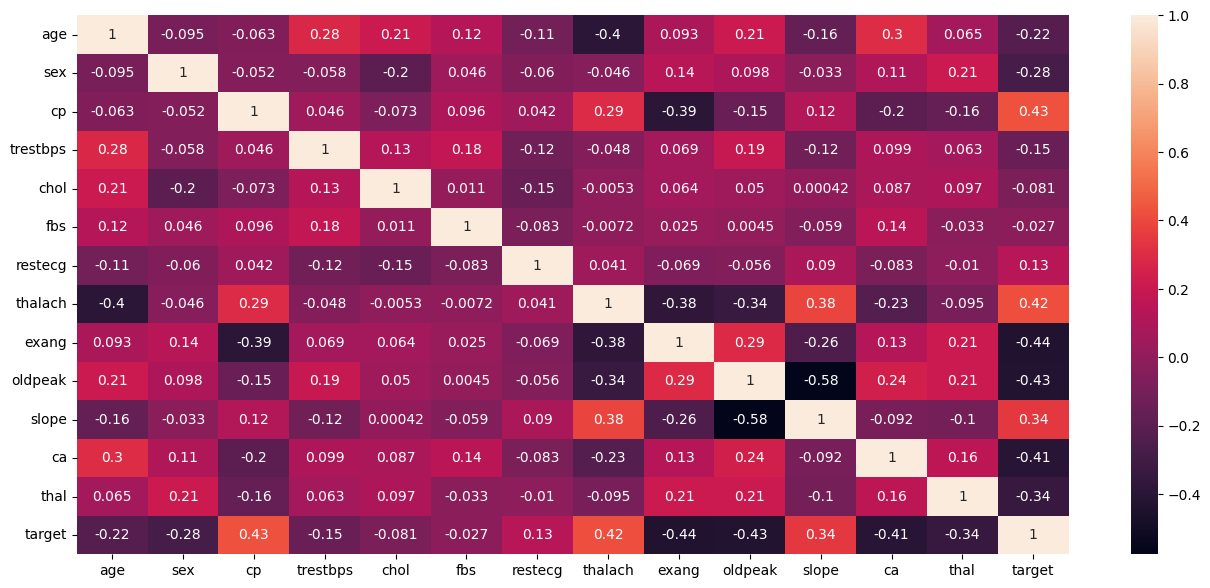

In [11]:
# define correlation matrix
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True)

In [12]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [13]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

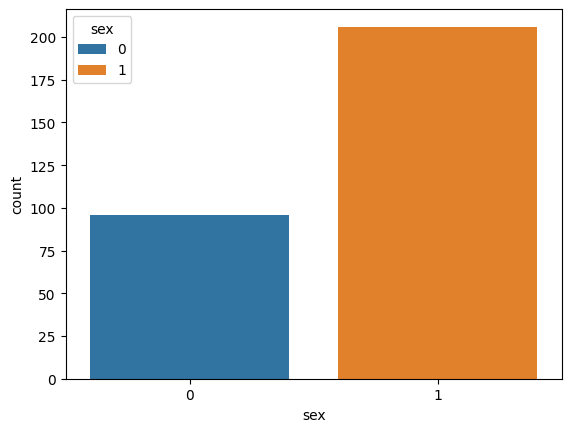

In [14]:
sns.countplot(x='sex',data=data,hue='sex')

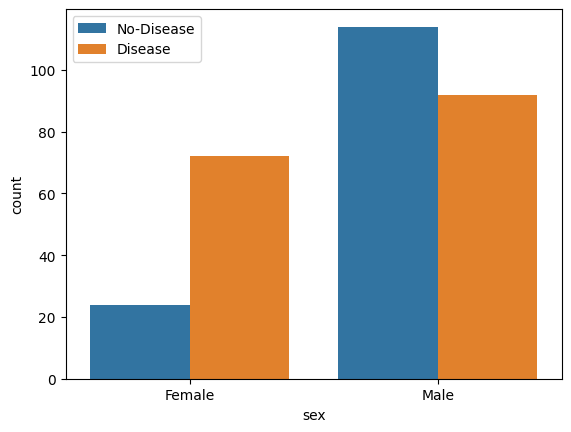

In [15]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()


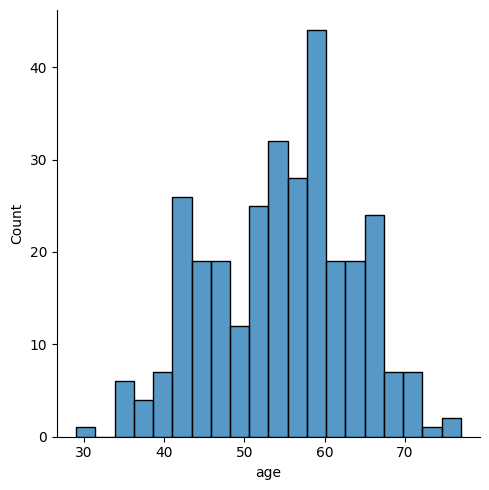

In [16]:
sns.displot(data['age'],bins=20)
plt.show()

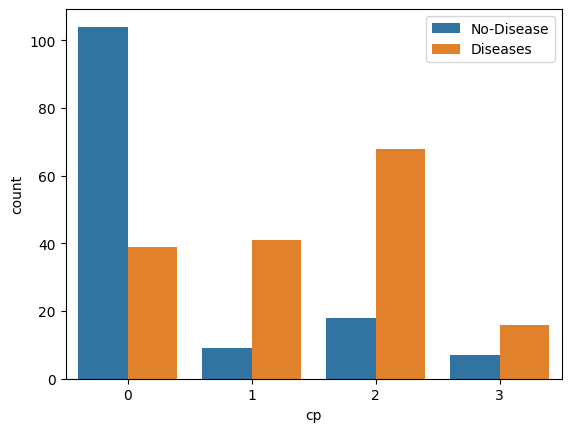

In [17]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

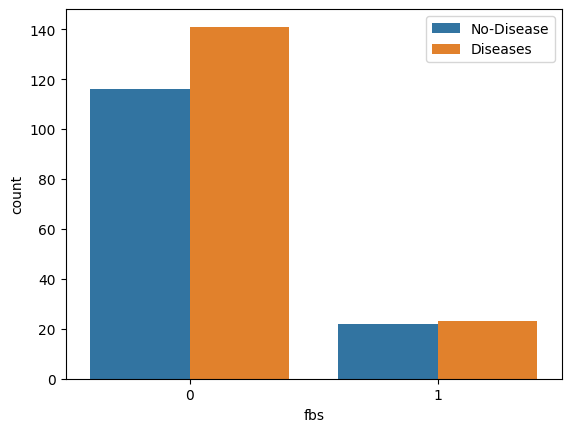

In [18]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

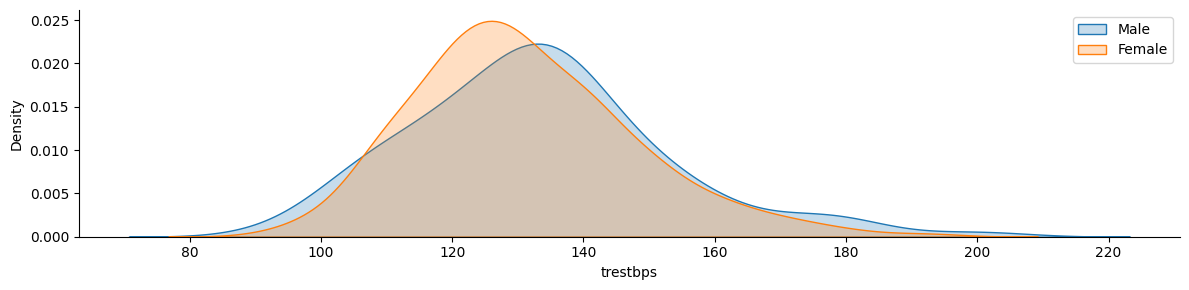

In [19]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])


<Axes: >

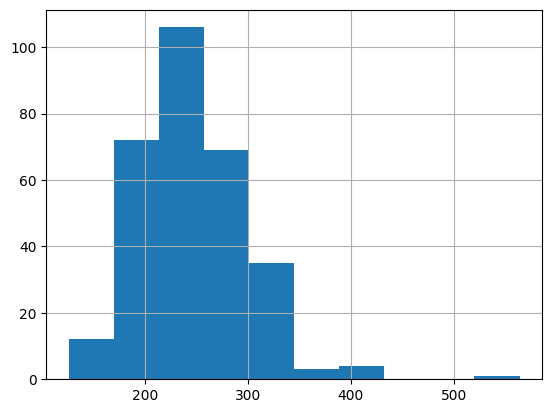

In [20]:
data['chol'].hist()

# Segregating Cat/ Non Catigorical  values

In [21]:
cate_val = []
cont_val = []
for column in data.columns:
    if len(data[column].unique())<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [22]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

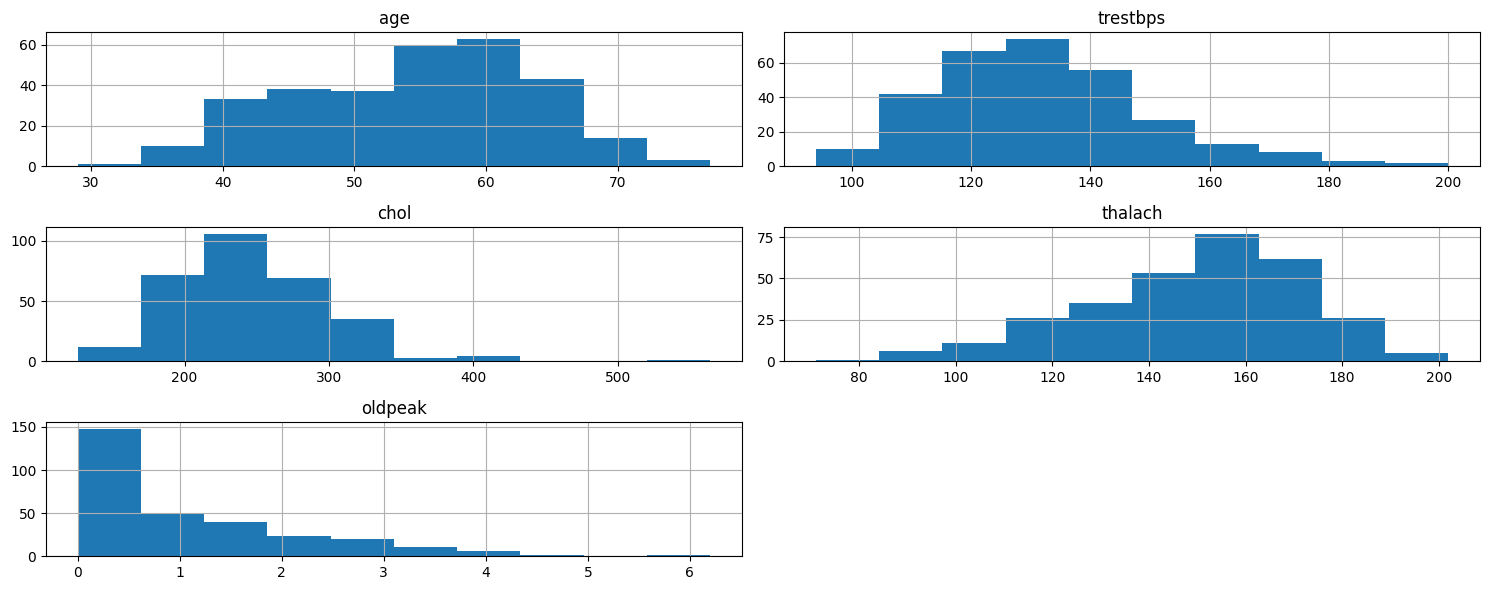

In [23]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()


In [24]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [25]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [26]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Scaling the Features:

In [28]:
import sklearn

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [32]:
X=data.drop('target', axis=1)
y=data['target']

In [33]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

# logisticRegression

In [37]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred1=log.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# SVC( Support Vector Classifier)

In [41]:
from  sklearn import svm

In [42]:
svm=svm.SVC()

In [43]:
svm.fit(X_train,y_train)

SVC()

In [44]:
y_pred2=svm.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier()

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred3=knn.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [51]:
score=[] 
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [52]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [53]:

    knn=KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy_score(y_test,y_pred)

0.7377049180327869

# Non Linear Machine learning Algorithms

In [54]:
data=pd.read_csv('heart.csv')

In [55]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [56]:
data=data.drop_duplicates()

In [57]:
data.shape

(302, 14)

In [58]:
X=data.drop('target',axis=1)
y=data['target']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

# Decision Treee Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt=DecisionTreeClassifier()

In [62]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred4=dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

# Random Forest Classifier

In [65]:
from sklearn .ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred5=rf.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

# Gradient Boosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc=GradientBoostingClassifier()

In [72]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [73]:
y_pred6=gbc.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [75]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})
                                

In [76]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.737705
3,DT,0.770492
4,RF,0.852459
5,GB,0.803279


# Comparision Of Accuracy Score Of Models used

In [77]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

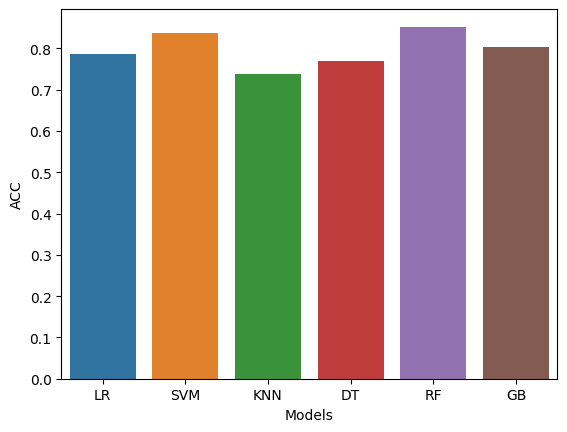

In [78]:
sns.barplot(x='Models', y='ACC', data=final_data,hue='Models')

In [79]:
X=data.drop('target', axis=1)
y=data['target']

In [80]:
X.shape


(302, 13)

In [81]:
from sklearn .ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Prediction For Using New Data

In [83]:
import pandas as pd

In [84]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])
    
    

In [85]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [86]:
p=rf.predict(new_data)
if p[0]==0:
    print(" No Disease")
else:
    print("Disease")

 No Disease


# GUI For Heart Disease Prediction Using Pickle

In [87]:
import pickle
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [89]:
with open("heart_disease_rf.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pickle

# Load the trained model and scaler
with open("heart_disease_rf.pkl", "rb") as f:
    rf = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Function to make predictions
def predict_heart_disease():
    try:
        # Get user inputs
        age = float(entry_age.get())
        sex = float(entry_sex.get())
        cp = float(entry_cp.get())
        trestbps = float(entry_trestbps.get())
        chol = float(entry_chol.get())
        fbs = float(entry_fbs.get())
        restecg = float(entry_restecg.get())
        thalach = float(entry_thalach.get())
        exang = float(entry_exang.get())
        oldpeak = float(entry_oldpeak.get())
        slope = float(entry_slope.get())
        ca = float(entry_ca.get())
        thal = float(entry_thal.get())
    except ValueError:
        result_label.config(text="Invalid input. Please enter numeric values.")
        return

    # Prepare the data for prediction
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 1:
        result_text = "Heart Disease Detected"
    else:
        result_text = "No Heart Disease Detected"

    # Display the prediction
    result_label.config(text=result_text)

# Create the main window
window = tk.Tk()
window.title("Heart Disease Predictor")

# Create input fields
label_age = ttk.Label(window, text="Age:")
label_age.grid(row=0, column=0, padx=10, pady=5)
entry_age = ttk.Entry(window)
entry_age.grid(row=0, column=1, padx=10, pady=5)

label_sex = ttk.Label(window, text="Sex (1=male, 0=female):")
label_sex.grid(row=1, column=0, padx=10, pady=5)
entry_sex = ttk.Entry(window)
entry_sex.grid(row=1, column=1, padx=10, pady=5)

label_cp = ttk.Label(window, text="Chest Pain Type (0-3):")
label_cp.grid(row=2, column=0, padx=10, pady=5)
entry_cp = ttk.Entry(window)
entry_cp.grid(row=2, column=1, padx=10, pady=5)

label_trestbps = ttk.Label(window, text="Resting Blood Pressure:")
label_trestbps.grid(row=3, column=0, padx=10, pady=5)
entry_trestbps = ttk.Entry(window)
entry_trestbps.grid(row=3, column=1, padx=10, pady=5)

label_chol = ttk.Label(window, text="Serum Cholestoral:")
label_chol.grid(row=4, column=0, padx=10, pady=5)
entry_chol = ttk.Entry(window)
entry_chol.grid(row=4, column=1, padx=10, pady=5)

label_fbs = ttk.Label(window, text="Fasting Blood Sugar > 120 mg/dl (1=true, 0=false):")
label_fbs.grid(row=5, column=0, padx=10, pady=5)
entry_fbs = ttk.Entry(window)
entry_fbs.grid(row=5, column=1, padx=10, pady=5)

label_restecg = ttk.Label(window, text="Resting Electrocardiographic Results (0-2):")
label_restecg.grid(row=6, column=0, padx=10, pady=5)
entry_restecg = ttk.Entry(window)
entry_restecg.grid(row=6, column=1, padx=10, pady=5)

label_thalach = ttk.Label(window, text="Maximum Heart Rate Achieved:")
label_thalach.grid(row=7, column=0, padx=10, pady=5)
entry_thalach = ttk.Entry(window)
entry_thalach.grid(row=7, column=1, padx=10, pady=5)

label_exang = ttk.Label(window, text="Exercise Induced Angina (1=yes, 0=no):")
label_exang.grid(row=8, column=0, padx=10, pady=5)
entry_exang = ttk.Entry(window)
entry_exang.grid(row=8, column=1, padx=10, pady=5)

label_oldpeak = ttk.Label(window, text="ST Depression Induced by Exercise:")
label_oldpeak.grid(row=9, column=0, padx=10, pady=5)
entry_oldpeak = ttk.Entry(window)
entry_oldpeak.grid(row=9, column=1, padx=10, pady=5)

label_slope = ttk.Label(window, text="Slope of the Peak Exercise ST Segment (0-2):")
label_slope.grid(row=10, column=0, padx=10, pady=5)
entry_slope = ttk.Entry(window)
entry_slope.grid(row=10, column=1, padx=10, pady=5)

label_ca = ttk.Label(window, text="Number of Major Vessels (0-3):")
label_ca.grid(row=11, column=0, padx=10, pady=5)
entry_ca = ttk.Entry(window)
entry_ca.grid(row=11, column=1, padx=10, pady=5)

label_thal = ttk.Label(window, text="Thal (0=normal; 1=fixed defect; 2=reversable defect):")
label_thal.grid(row=12, column=0, padx=10, pady=5)
entry_thal = ttk.Entry(window)
entry_thal.grid(row=12, column=1, padx=10, pady=5)

# Create predict button
predict_button = ttk.Button(window, text="Predict", command=predict_heart_disease)
predict_button.grid(row=13, column=0, columnspan=2, padx=10, pady=10)

# Create result label
result_label = ttk.Label(window, text="")
result_label.grid(row=14, column=0, columnspan=2, padx=10, pady=10)

# Run the application
window.mainloop()


In [ ]:
import joblib

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
from sklearn .ensemble import RandomForestClassifier

In [ ]:
X=data.drop('target', axis=1)
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf=RandomForestClassifier()
rf.fit(X,y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
joblib.dump(rf, "heart_disease_rf.joblib")
joblib.dump(scaler, "scaler.joblib")

# GUI for Heart Disease Prediction Using JOBLIB

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import joblib

# Load the saved model and scaler
rf = joblib.load("heart_disease_rf.joblib")
scaler = joblib.load("scaler.joblib")

# Create the GUI window
root = tk.Tk()
root.title("Heart Disease Prediction")

# Define input fields for user data
labels = ["Age", "Sex (1=Male, 0=Female)", "Chest Pain Type (0-3)", "Resting Blood Pressure", "Cholesterol", 
          "Fasting Blood Sugar (1=True, 0=False)", "Resting ECG (0-2)", "Max Heart Rate", 
          "Exercise Induced Angina (1=Yes, 0=No)", "Oldpeak", "Slope (0-2)", "Number of Major Vessels (0-3)", "Thal (0-3)"]

entries = []
for label in labels:
    row = tk.Frame(root)
    lab = tk.Label(row, width=22, text=label + ": ", anchor='w')
    ent = tk.Entry(row)
    row.pack(side=tk.TOP, fill=tk.X, padx=5, pady=5)
    lab.pack(side=tk.LEFT)
    ent.pack(side=tk.RIGHT, expand=tk.YES, fill=tk.X)
    entries.append(ent)

def predict():
    try:
        # Collect input data from user
        user_data = np.array([float(entry.get()) for entry in entries]).reshape(1, -1)
        # Scale the input data
        user_data_scaled = scaler.transform(user_data)
        # Predict using the loaded model
        prediction = model.predict(user_data_scaled)
        # Show result in a message box
        result = "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"
        messagebox.showinfo("Prediction Result", result)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers")

# Add predict button
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.pack(side=tk.BOTTOM, padx=10, pady=10)

# Start the GUI loop
root.mainloop()
